# COVID 19 India

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [3]:
data_train = pd.read_csv('covid-india.csv')
data_train.head()

,Date,New Cases,Active Cases,Recovered Cases,Deaths
0,30-Jan-20,1,1,0,0
1,31-Jan-20,0,0,0,0
2,1-Feb-20,0,0,0,0
3,2-Feb-20,1,1,0,0
4,3-Feb-20,1,1,0,0


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 5 columns):
Date               85 non-null object
New Cases          85 non-null int64
Active Cases       85 non-null int64
Recovered Cases    85 non-null int64
Deaths             85 non-null int64
dtypes: int64(4), object(1)
memory usage: 3.4+ KB


In [5]:
training_set_new = data_train.iloc[:,1:2].values
training_set_active = data_train.iloc[:,2:3].values
training_set_recovered = data_train.iloc[:,3:4].values
training_set_death = data_train.iloc[:,4:5].values

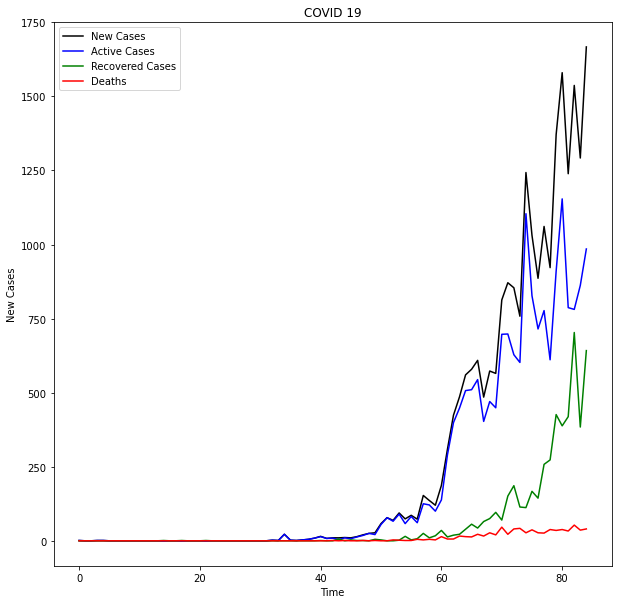

In [6]:
# Visualising the Results
plt.figure(figsize=(10,10))
plt.plot(training_set_new,color='black',label='New Cases')
plt.plot(training_set_active,color='blue',label='Active Cases')
plt.plot(training_set_recovered,color='green',label='Recovered Cases')
plt.plot(training_set_death,color='red',label='Deaths')
plt.title("COVID 19")
plt.xlabel('Time')
plt.ylabel('New Cases')
plt.legend()
plt.savefig("Complete.jpg")

## New Cases

In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
training_set_new_scaled = scaler.fit_transform(training_set_new)
# Create a data structure
X_train = []
y_train = []
timesteps = 30
for i in range(timesteps,len(training_set_new_scaled)):
    X_train.append(training_set_new_scaled[i-timesteps:i,0])
    y_train.append(training_set_new_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)
# Reshaping
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape
regressor = Sequential()
# First LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# Output Layer
regressor.add(Dense(units=1))
# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
# Fitting the RNN to training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
55/55 [==============================] - 3s 51ms/step - loss: 0.1464
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 0.1068
Epoch 3/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0632
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0417
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 6/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 7/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 8/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 9/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 10/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0223
Epoch 11/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 12/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 13/100
55/55 [================

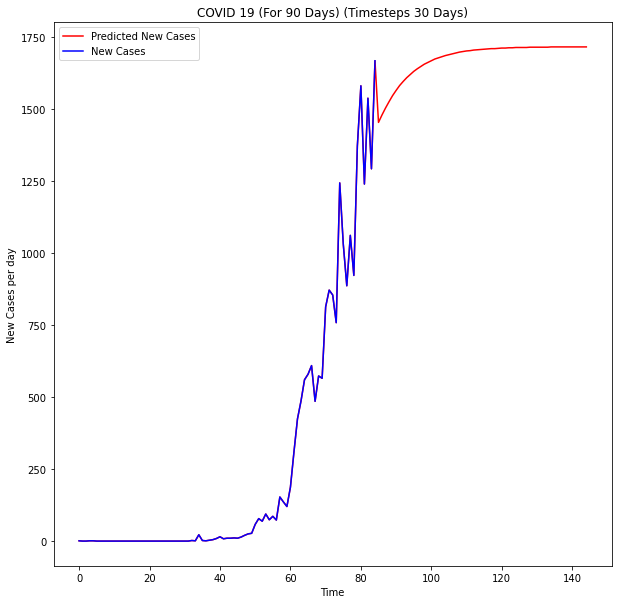

In [8]:
# Predicting Result
import math
inputs = data_train.iloc[:,1:2][len(training_set_new)-timesteps:].values
preds = []
days = 90
for i in range(timesteps,days):
    inputs = inputs.reshape(-1,1)
    inputs = scaler.transform(inputs)
    X_test = []
    X_test.append(inputs[i-timesteps:i])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
    pred = regressor.predict(X_test)
    pred = scaler.inverse_transform(pred)
    inputs = scaler.inverse_transform(inputs)
    inputs = np.append(inputs,math.ceil(pred[0]))
    preds.append(math.ceil(pred[0][0]))
total = data_train.iloc[:,1:2].values
total = np.append(total,preds)
# Visualising the Results
plt.figure(figsize=(10,10))
plt.plot(total,color='red',label='Predicted New Cases')
plt.plot(training_set_new,color='blue',label='New Cases')
title = "COVID 19 (For " + str(days) +" Days) (Timesteps "+str(timesteps)+" Days)"
plt.title(title)
plt.xlabel('Time')
plt.ylabel('New Cases per day')
plt.legend()
filename = "new "+str(days)+".jpg"
plt.savefig(filename)

In [9]:
preds[0]

1453

## Active Cases

In [10]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
training_set_active_scaled = scaler.fit_transform(training_set_active)
# Create a data structure with 30 timesteps and 1 output
X_train = []
y_train = []
timesteps = 30
for i in range(timesteps,len(training_set_active_scaled)):
    X_train.append(training_set_active_scaled[i-timesteps:i,0])
    y_train.append(training_set_active_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)
# Reshaping
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape
regressor = Sequential()
# First LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# Output Layer
regressor.add(Dense(units=1))
# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
# Fitting the RNN to training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
55/55 [==============================] - 1s 22ms/step - loss: 0.1597
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 0.1180
Epoch 3/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0734
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0557
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0626
Epoch 6/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0339
Epoch 7/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0347
Epoch 8/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0334
Epoch 9/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0335
Epoch 10/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0301
Epoch 11/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 12/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0326
Epoch 13/100
55/55 [================

In [11]:
# Predicting Result
import math
inputs = data_train.iloc[:,2:3][len(training_set_active)-timesteps:].values
preds = []
days = 90
for i in range(timesteps,days):
    inputs = inputs.reshape(-1,1)
    inputs = scaler.transform(inputs)
    X_test = []
    X_test.append(inputs[i-timesteps:i])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
    pred = regressor.predict(X_test)
    pred = scaler.inverse_transform(pred)
    inputs = scaler.inverse_transform(inputs)
    inputs = np.append(inputs,math.ceil(pred[0]))
    preds.append(math.ceil(pred[0][0]))

In [12]:
preds[0]

905

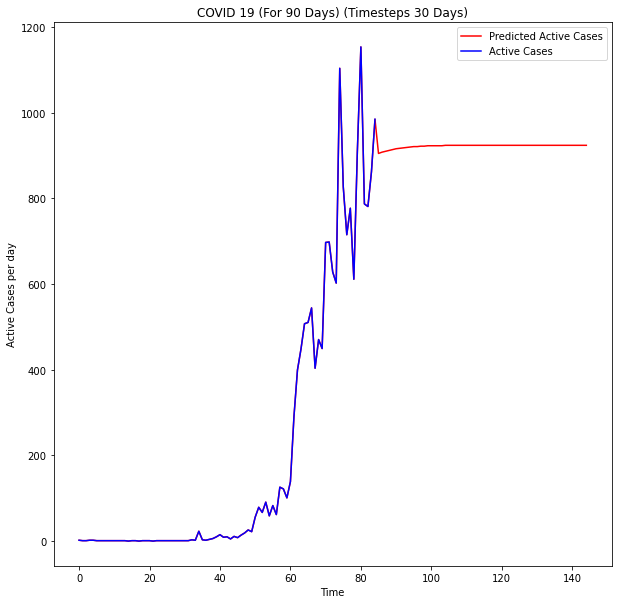

In [13]:
total = data_train.iloc[:,2:3].values
total = np.append(total,preds)
# Visualising the Results
plt.figure(figsize=(10,10))
plt.plot(total,color='red',label='Predicted Active Cases')
plt.plot(training_set_active,color='blue',label='Active Cases')
title = "COVID 19 (For " + str(days) +" Days) (Timesteps "+str(timesteps)+" Days)"
plt.title(title)
plt.xlabel('Time')
plt.ylabel('Active Cases per day')
plt.legend()
filename = "active "+str(days)+".jpg"
plt.savefig(filename)

## Recovered Cases

In [14]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
training_set_recovered_scaled = scaler.fit_transform(training_set_recovered)
# Create a data structure
X_train = []
y_train = []
timesteps = 30
for i in range(timesteps,len(training_set_recovered_scaled)):
    X_train.append(training_set_recovered_scaled[i-timesteps:i,0])
    y_train.append(training_set_recovered_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)
# Reshaping
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape
regressor = Sequential()
# First LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# Output Layer
regressor.add(Dense(units=1))
# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
# Fitting the RNN to training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
55/55 [==============================] - 1s 23ms/step - loss: 0.0670
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 3/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0503
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0441
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0423
Epoch 6/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0376
Epoch 7/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0307
Epoch 8/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 9/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 10/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 11/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 12/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 13/100
55/55 [================

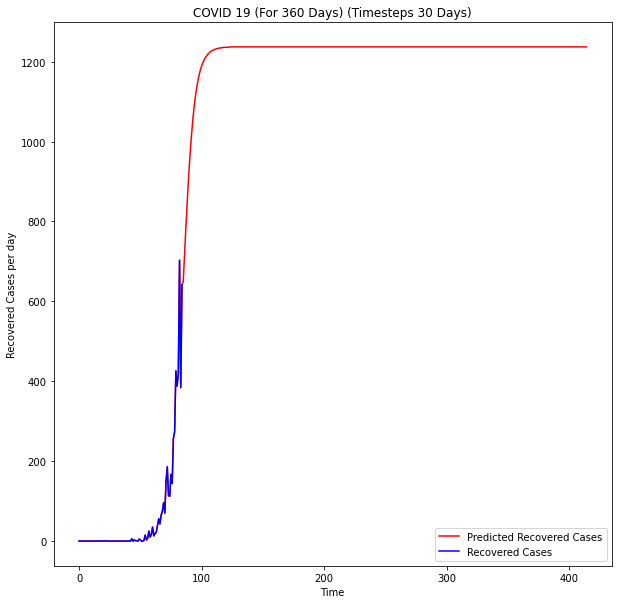

In [15]:
# Predicting Result
import math
inputs = data_train.iloc[:,3:4][len(training_set_recovered)-timesteps:].values
preds = []
days = 360
for i in range(timesteps,days):
    inputs = inputs.reshape(-1,1)
    inputs = scaler.transform(inputs)
    X_test = []
    X_test.append(inputs[i-timesteps:i])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
    pred = regressor.predict(X_test)
    pred = scaler.inverse_transform(pred)
    inputs = scaler.inverse_transform(inputs)
    inputs = np.append(inputs,math.ceil(pred[0]))
    preds.append(math.ceil(pred[0][0]))
total = data_train.iloc[:,3:4].values
total = np.append(total,preds)
# Visualising the Results
plt.figure(figsize=(10,10))
plt.plot(total,color='red',label='Predicted Recovered Cases')
plt.plot(training_set_recovered,color='blue',label='Recovered Cases')
title = "COVID 19 (For " + str(days) +" Days) (Timesteps "+str(timesteps)+" Days)"
plt.title(title)
plt.xlabel('Time')
plt.ylabel('Recovered Cases per day')
plt.legend()
filename = "recovered "+str(days)+".jpg"
plt.savefig(filename)

In [16]:
preds[0]

648

## Deaths

In [17]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
training_set_death_scaled = scaler.fit_transform(training_set_death)
# Create a data structure
X_train = []
y_train = []
timesteps = 60
for i in range(timesteps,len(training_set_death_scaled)):
    X_train.append(training_set_death_scaled[i-timesteps:i,0])
    y_train.append(training_set_death_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)
# Reshaping
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape
regressor = Sequential()
# First LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# Output Layer
regressor.add(Dense(units=1))
# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
# Fitting the RNN to training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
25/25 [==============================] - 1s 50ms/step - loss: 0.3382
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2934
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2497
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2032
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1478
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0871
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0433
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0363
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0776
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0653
Epoch 11/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0581
Epoch 12/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0385
Epoch 13/100
25/25 [================

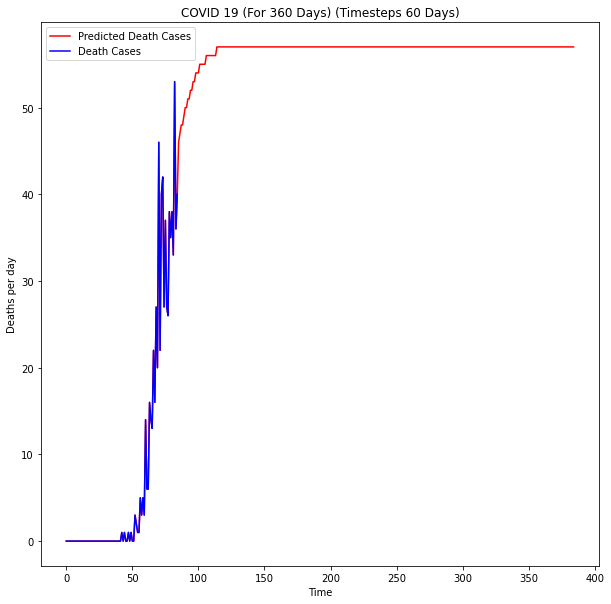

In [18]:
# Predicting Result
import math
inputs = data_train.iloc[:,4:5][len(training_set_death)-timesteps:].values
preds = []
days = 360
for i in range(timesteps,days):
    inputs = inputs.reshape(-1,1)
    inputs = scaler.transform(inputs)
    X_test = []
    X_test.append(inputs[i-timesteps:i])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
    pred = regressor.predict(X_test)
    pred = scaler.inverse_transform(pred)
    inputs = scaler.inverse_transform(inputs)
    inputs = np.append(inputs,math.ceil(pred[0]))
    preds.append(math.ceil(pred[0][0]))
total = data_train.iloc[:,4:5].values
total = np.append(total,preds)
# Visualising the Results
plt.figure(figsize=(10,10))
plt.plot(total,color='red',label='Predicted Death Cases')
plt.plot(training_set_death,color='blue',label='Death Cases')
title = "COVID 19 (For " + str(days) +" Days) (Timesteps "+str(timesteps)+" Days)"
plt.title(title)
plt.xlabel('Time')
plt.ylabel('Deaths per day')
plt.legend()
filename = "death "+str(days)+".jpg"
plt.savefig(filename)

In [19]:
preds[0]

46